In [1]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pickle as pkl
import pandas as pd

In [15]:
with open("cdiac_priority_list", 'rb') as f:
	cdiac_priority_list = pkl.load(f)

cdiac_priority_list.sort(key = lambda x: -x[2], reverse=True)
print(len(cdiac_priority_list))
for i in range(len(cdiac_priority_list)):
	if i == 5:
		break
	print(cdiac_priority_list[i])

	

1500438
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub/ndp037/IBSNAT/1984/px088401.ct5', 'tabular', -10.448103090630696)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub/ndp037/IBSNAT/1984/px138401.ct5', 'tabular', -10.448103090630696)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub/ndp037/IBSNAT/1984/px088401.ct5', 'tabular', -10.448103090630696)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub/ndp037/IBSNAT/1984/px138401.ct5', 'tabular', -10.448103090630696)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub/ndp037/IBSNAT/1986/px168601.ct5', 'tabular', -10.448103038922861)


In [16]:
FREQ_THRESH = 0.1
early_freq = {"c-code": 1, "hdf": 1, "images": 1, "jsonxml": 1, "keyword": 1, "netcdf": 1, "python": 1, "tabular": 1}
num_files = int(FREQ_THRESH * len(cdiac_priority_list))

cdiac_priority_list_unbias = []

for i in range(num_files):
	early_freq[cdiac_priority_list[i][1]] += 1

for i in range(len(cdiac_priority_list)):
	if cdiac_priority_list[i][2] > 0:
		cdiac_priority_list_unbias.append((cdiac_priority_list[i][0], cdiac_priority_list[i][1],
		 cdiac_priority_list[i][2] / early_freq[cdiac_priority_list[i][1]]))
	#else:
		#cdiac_priority_list_unbias.append((cdiac_priority_list[i][0], cdiac_priority_list[i][1],
		#  cdiac_priority_list[i][2] * (early_freq[cdiac_priority_list[i][1]] + 1)))
	
cdiac_priority_list_unbias.sort(key = lambda x: -x[2], reverse=True)
print(early_freq)

{'c-code': 1287, 'hdf': 0, 'images': 20896, 'jsonxml': 38995, 'keyword': 22729, 'netcdf': 3999, 'python': 181, 'tabular': 61956}


In [17]:
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
extractor_count = {"c-code": [], "hdf": [], "images": [], "jsonxml": [], "keyword": [], "netcdf": [], "python": [], "tabular": []}
extractor_thresh = {"c-code": 0, "hdf": 0, "images": 0, "jsonxml": 0, "keyword": 0, "netcdf": 0, "python": 0, "tabular": 0}


thresholds = x.copy()
for i in range(len(thresholds)):
	thresholds[i] = int(len(cdiac_priority_list_unbias) * thresholds[i])

print(thresholds)
thresholds = set(thresholds) 
print(thresholds)
tabs = 0
i = 0
while i < len(cdiac_priority_list_unbias):

	if i == 0:
		for k, v in extractor_count.items():
			v.append(0)
	elif i + 1 in thresholds:
		print(i + 1)
		for k, v in extractor_thresh.items():
			extractor_count[k].append(v)

	extractor_thresh[cdiac_priority_list_unbias[i][1]] += 1

	i += 1

print(len(cdiac_priority_list))
print(extractor_thresh)

[0, 137758, 275517, 413276, 551035, 688794, 826553, 964312, 1102071, 1239830, 1377589]
{0, 1377589, 1239830, 1102071, 964312, 826553, 688794, 551035, 413276, 275517, 137758}
137758
275517
413276
551035
688794
826553
964312
1102071
1239830
1377589
1500438
{'c-code': 213327, 'hdf': 0, 'images': 193698, 'jsonxml': 201899, 'keyword': 191734, 'netcdf': 210363, 'python': 214210, 'tabular': 152358}


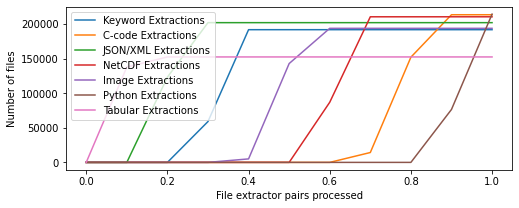

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(x, extractor_count["keyword"], label="Keyword Extractions")
plt.plot(x, extractor_count["c-code"], label="C-code Extractions")
plt.plot(x, extractor_count["jsonxml"], label="JSON/XML Extractions")
plt.plot(x, extractor_count["netcdf"], label="NetCDF Extractions")
plt.plot(x, extractor_count["images"], label="Image Extractions")
plt.plot(x, extractor_count["python"], label="Python Extractions")
plt.plot(x, extractor_count["tabular"], label="Tabular Extractions")

plt.xlabel("File extractor pairs processed")
plt.ylabel("Number of files")
plt.legend()
plt.show()